In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
data = pd.read_csv('train.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,100000,2,2,2,26,-1,-1,-1,0,...,3542,1980,3980,4210,4159,1000,1080,2000,1525,0
1,1,100000,1,2,1,47,0,0,2,0,...,64287,67838,66135,7000,0,2500,5500,0,3000,0
2,2,30000,2,2,2,23,3,3,3,3,...,29176,29958,30520,1200,1200,0,1400,1200,0,1
3,3,280000,2,1,2,31,2,-1,-1,-2,...,0,0,0,168,0,0,0,0,0,0
4,4,210000,1,2,1,54,2,-1,-1,-1,...,485,210,3483,176,195,485,0,4466,417,0


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          27000 non-null  int64
 1   LIMIT_BAL                   27000 non-null  int64
 2   SEX                         27000 non-null  int64
 3   EDUCATION                   27000 non-null  int64
 4   MARRIAGE                    27000 non-null  int64
 5   AGE                         27000 non-null  int64
 6   PAY_0                       27000 non-null  int64
 7   PAY_2                       27000 non-null  int64
 8   PAY_3                       27000 non-null  int64
 9   PAY_4                       27000 non-null  int64
 10  PAY_5                       27000 non-null  int64
 11  PAY_6                       27000 non-null  int64
 12  BILL_AMT1                   27000 non-null  int64
 13  BILL_AMT2                   27000 non-null  int64
 14  BILL_A

In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27000.00000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,2.700000e+04,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,13499.50000,167720.728889,1.603222,1.851667,1.552963,35.486778,-0.015593,-0.132407,-0.167593,-0.219407,...,43323.950148,40387.517852,38937.254593,5696.015889,5.986320e+03,5263.971296,4866.874519,4831.716741,5215.986519,0.221370
std,7794.37297,129930.809212,0.489238,0.791893,0.522478,9.213408,1.127431,1.197978,1.192726,1.166120,...,64555.808717,60975.562843,59684.515387,16840.646208,2.377914e+04,18001.091009,16021.590858,15499.162587,17681.861320,0.415177
min,0.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6749.75000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2384.500000,1780.000000,1270.750000,1000.000000,8.710000e+02,390.000000,298.000000,259.000000,130.000000,0.000000
50%,13499.50000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19078.500000,18135.000000,17135.000000,2100.000000,2.013000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20249.25000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54345.500000,50149.000000,49205.250000,5012.000000,5.000000e+03,4532.250000,4010.000000,4051.000000,4000.000000,0.000000
max,26999.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


<AxesSubplot:>

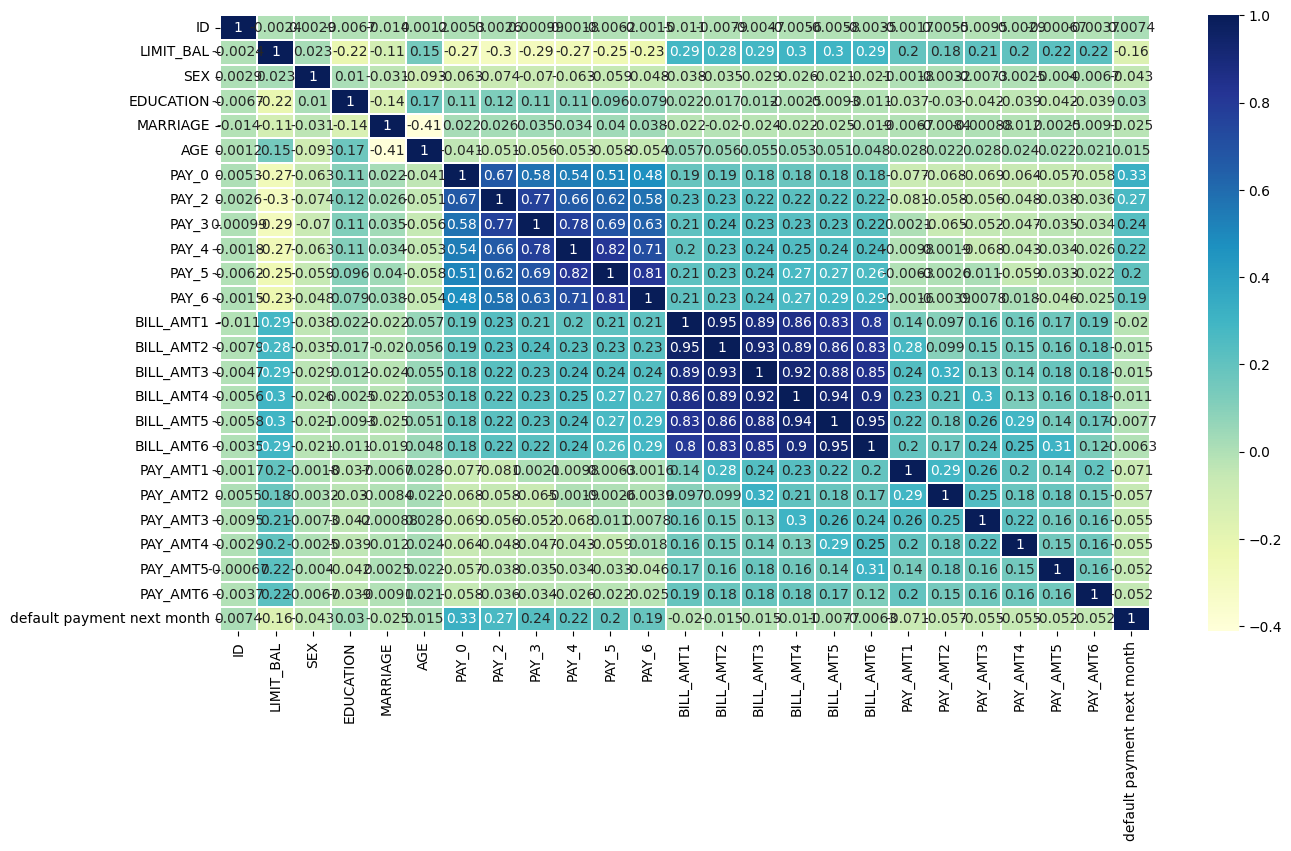

In [5]:
corrmat = data.corr()
corrmat
f, ax = plt.subplots(figsize =(15, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

In [6]:
data.drop(['ID', 'LIMIT_BAL'], axis = 1, inplace=True)
data.head(2)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,2,2,2,26,-1,-1,-1,0,0,0,...,3542,1980,3980,4210,4159,1000,1080,2000,1525,0
1,1,2,1,47,0,0,2,0,0,2,...,64287,67838,66135,7000,0,2500,5500,0,3000,0


In [7]:
data.drop(['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4', "PAY_AMT5", 'PAY_AMT6'], axis=1, inplace=True)
data.head(2)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month
0,2,2,2,26,-1,-1,-1,0,0,0,1370,4192,4159,3542,1980,3980,0
1,1,2,1,47,0,0,2,0,0,2,66539,71766,69111,64287,67838,66135,0


In [8]:
data['default payment next month'].value_counts()

0    21023
1     5977
Name: default payment next month, dtype: int64

<AxesSubplot:>

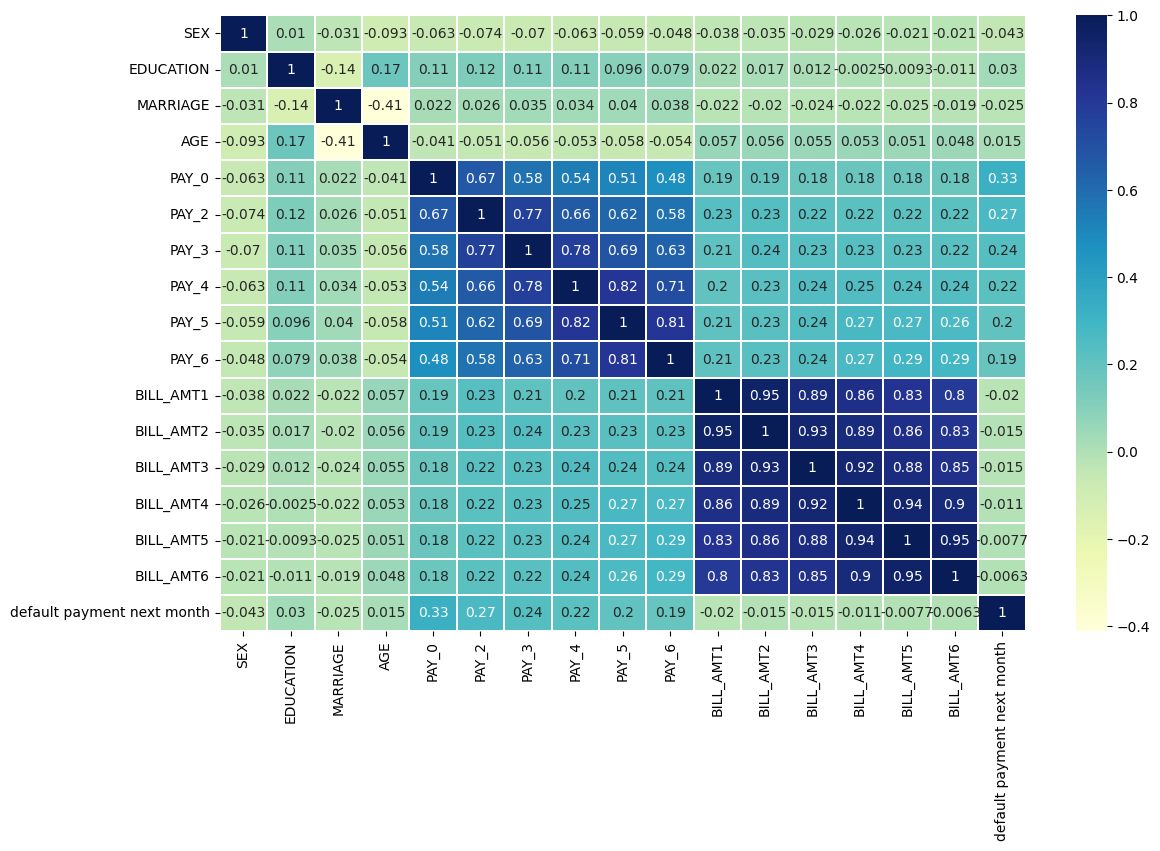

In [9]:
corrmat = data.corr()
corrmat
f, ax = plt.subplots(figsize =(13, 8))
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1, annot=True)

In [10]:
data.drop(['MARRIAGE', 'SEX', 'BILL_AMT1'], axis = 1, inplace=True)
data.head()

,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month
0,2,26,-1,-1,-1,0,0,0,4192,4159,3542,1980,3980,0
1,2,47,0,0,2,0,0,2,71766,69111,64287,67838,66135,0
2,2,23,3,3,3,3,2,2,29532,29954,29176,29958,30520,1
3,1,31,2,-1,-1,-2,-2,-2,168,0,0,0,0,0
4,2,54,2,-1,-1,-1,-1,-1,176,195,485,210,3483,0


In [11]:
data.drop(['AGE','EDUCATION'], axis=1, inplace=True)

In [73]:
list(data.columns)

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'default payment next month']

In [12]:
data.shape

(27000, 12)

In [13]:
y = data['default payment next month']
X = data.drop(['default payment next month'], axis = 1)

In [14]:
fraud = data[data['default payment next month']==1]

normal = data[data['default payment next month']==0]

In [15]:
print(fraud.shape,normal.shape)

(5977, 12) (21023, 12)


In [16]:
fraud

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,default payment next month
2,3,3,3,3,2,2,29532,29954,29176,29958,30520,1
6,0,0,0,0,0,0,64128,62736,59133,57662,53059,1
7,1,2,2,0,0,0,40154,39214,39861,41063,42918,1
16,2,2,0,0,0,0,48878,47884,29506,3672,8346,1
23,1,2,0,0,0,2,84423,86173,87942,92756,91146,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26992,1,-2,-1,0,0,-2,0,3508,3508,-200,-200,1
26993,0,0,0,0,0,0,169969,170142,119529,122059,111378,1
26996,2,2,2,2,2,2,166590,168386,164182,169029,172084,1
26998,0,0,0,0,2,2,70488,51152,35122,28633,28039,1


In [17]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [18]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [19]:
X_res.shape,y_res.shape

((40220, 11), (40220,))

In [20]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 21023, 1: 5977})
Resampled dataset shape Counter({0: 20110, 1: 20110})


In [21]:
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()

In [22]:
X_train_res, y_train_res = os.fit_resample(X, y)

In [23]:
X_train_res.shape,y_train_res.shape

((42046, 11), (42046,))

In [24]:
X_train_res.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,-1,-1,-1,0,0,0,4192,4159,3542,1980,3980
1,0,0,2,0,0,2,71766,69111,64287,67838,66135
2,3,3,3,3,2,2,29532,29954,29176,29958,30520
3,2,-1,-1,-2,-2,-2,168,0,0,0,0
4,2,-1,-1,-1,-1,-1,176,195,485,210,3483


In [25]:
X2, y2 = X_train_res, y_train_res

### scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X2 = scaler.fit_transform(X2)
X2 = pd.DataFrame(X2)
X2.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.1,0.1,0.1,0.2,0.2,0.2,0.070199,0.088628,0.163474,0.082611,0.264037
1,0.2,0.2,0.4,0.2,0.2,0.4,0.134328,0.124289,0.220695,0.147914,0.311802


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33, random_state=33)

In [70]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# l2_regularization = 100.0
lgbm = LGBMClassifier(learning_rate=0.02, n_estimators=50000, max_depth=-1, reg_lambda=90.0)#, n_estimators= 150)#, reg_lambda=l2_regularization)
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train))
predictions = lgbm.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9401490947816826
0.8403718650908043


In [71]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      6905
           1       0.82      0.88      0.85      6971

    accuracy                           0.84     13876
   macro avg       0.84      0.84      0.84     13876
weighted avg       0.84      0.84      0.84     13876

[[5520 1385]
 [ 830 6141]]


### preparing test.csv for submissions

In [72]:
test_data = pd.read_csv('test.csv')
test_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,27000,30000,1,2,2,25,0,0,0,0,...,11581,12580,13716,14828,1500,2000,1500,1500,1500,2000
1,27001,150000,2,1,2,26,0,0,0,0,...,116684,101581,77741,77264,4486,4235,3161,2647,2669,2669
2,27002,70000,2,3,1,32,0,0,0,0,...,68530,69753,70111,70212,2431,3112,3000,2438,2500,2554
3,27003,130000,1,3,2,49,0,0,0,0,...,16172,16898,11236,6944,1610,1808,7014,27,7011,4408
4,27004,50000,2,2,2,36,0,0,0,0,...,42361,19574,20295,19439,2000,1500,1000,1800,0,1000


In [76]:
cols = ['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',]

In [77]:
test_data = test_data[cols]
test_data.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,0,0,0,0,0,0,10062,11581,12580,13716,14828
1,0,0,0,0,0,0,125651,116684,101581,77741,77264
2,0,0,0,0,0,0,69080,68530,69753,70111,70212
3,0,0,0,0,0,-1,18956,16172,16898,11236,6944
4,0,0,0,0,0,2,47635,42361,19574,20295,19439


In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler(feature_range=(0, 1))
test_data = scaler2.fit_transform(test_data)
test_data = pd.DataFrame(test_data)
test_data.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,0.2,0.222222,0.2,0.222222,0.222222,0.222222,0.040256,0.032467,0.029769,0.034844,0.120129
1,0.2,0.222222,0.2,0.222222,0.222222,0.222222,0.237380,0.243133,0.192674,0.164805,0.233753


In [79]:
y_pred_test = lgbm.predict(test_data)
y_pred_test[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [80]:
len(y_pred_test)

3000

In [ ]:
import csv

with open('lgbm_84.csv', mode='w') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['ID', 'default payment next month'])
    for i in range(27000, 30000):
        employee_writer.writerow([i, y_pred_test[i - 27000]])

df_sub = pd.read_csv('lgbm_84.csv')
df_sub.to_csv('lgbm_84.csv', index=False)